# P2: Investigate a Dataset

### Alona Varshal

#### Analysis of Titanic Data (891 passengers out of more than 2000)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
% matplotlib inline

### Loading the data

In [3]:
data = pd.read_csv('titanic_data.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Missing data under "Cabin". 

### Statistical description of data


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Some Age data are also missing since its count is less than 891.

All other data looks fine, except for Sex and Embarked. I will not be looking at this data for this project.

In [5]:
# Some passengers have 0 Fare. Not sure what that means. Maybe they are workers in the Titanic?

data[data.Fare == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


### Overall % Survival

In [6]:
# While the data only represents 891 of the more than 2000 passengers of the Titanic,
# we will look at how many survived and how many didn't:

survival = data.Survived.value_counts()
survival

0    549
1    342
Name: Survived, dtype: int64

In [7]:
# Since I will be doing a lot of % calculation, I defined the following function:

from __future__ import division

def calc_percent(data):
    percent = 100 * data / data.sum()
    return percent

In [8]:
# % Survived of sample taken from Titanic passengers

percentsurvived = calc_percent(survival)
percentsurvived

0    61.616162
1    38.383838
Name: Survived, dtype: float64

It looks like the mean of "Survived" (from data.describe( ) done above) is the fraction of people who survived.

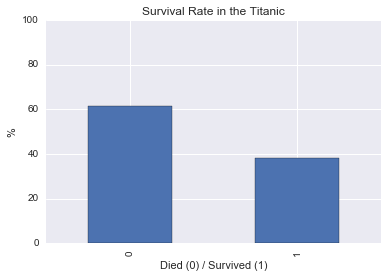

In [9]:
# Plot showing the survival rate 

percentsurvived.plot(kind='bar', ylim=[0,100])
plt.ylabel("%")
plt.xlabel("Died (0) / Survived (1)")
plt.title("Survival Rate in the Titanic")

### Sex

In [10]:
# How many males vs. females?

sex = data.Sex.value_counts()
print sex
print sex.sum()

male      577
female    314
Name: Sex, dtype: int64
891


Since the total was 891, there are no missing data under Sex.

In [11]:
percentsex = calc_percent(sex)
percentsex

male      64.758698
female    35.241302
Name: Sex, dtype: float64

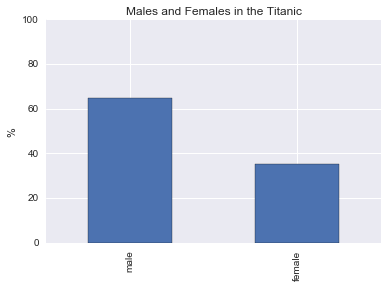

In [12]:
# Distribution of Sex

percentsex.plot(kind='bar', ylim=[0,100])
plt.ylabel("%")
plt.title("Males and Females in the Titanic")

#### What is the survival rate for the sexes?

In [13]:
# To calculate the survival per sex, we group by "Sex" and "Survived".

sex_survival_grp = data.groupby(["Sex", "Survived"]).size().unstack()
sex_survival_grp

Survived,0,1
Sex,,
female,81,233
male,468,109


In [14]:
sex_survival_grp["%survived"] = 100 * sex_survival_grp[1] / (sex_survival_grp[1] + sex_survival_grp[0])
sex_survival_grp

Survived,0,1,%survived
Sex,,,
female,81,233,74.203822
male,468,109,18.890815


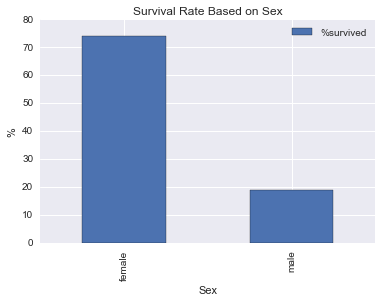

In [15]:
# Plot:

sex_survival_grp.plot(kind='bar', y='%survived')
plt.title('Survival Rate Based on Sex')
plt.ylabel('%')

Among females, the survival rate is 74% and among males, the survival rate is 19%. However, this does not represent all of the Titanic's population.

### Passenger Class

In [16]:
# How many people per passenger class?

classes = data.Pclass.value_counts().sort_index()
print classes
print classes.sum()

1    216
2    184
3    491
Name: Pclass, dtype: int64
891


In [17]:
# Calculation of percentage of classes

percentclasses = calc_percent(classes)
percentclasses

1    24.242424
2    20.650954
3    55.106622
Name: Pclass, dtype: float64

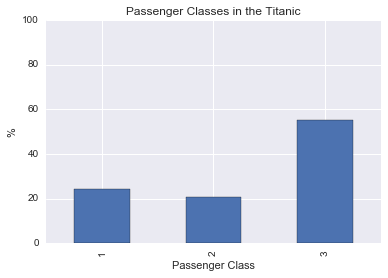

In [18]:
# Plot of passenger classes

percentclasses.plot(kind='bar', ylim=[0,100])
plt.ylabel("%")
plt.xlabel("Passenger Class")
plt.title("Passenger Classes in the Titanic")

#### Passenger Class vs. Survival

In [19]:
# To see how much of these classes survived, we group by Pclass and Survived:

pclass_survival_grp = data.groupby(["Pclass", "Survived"]).size()
pclass_survival_grp

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

In [20]:
# Calculation of percentages:

pclasspercent = calc_percent(pclass_survival_grp)
pclasspercent

Pclass  Survived
1       0            8.978676
        1           15.263749
2       0           10.886644
        1            9.764310
3       0           41.750842
        1           13.355780
dtype: float64

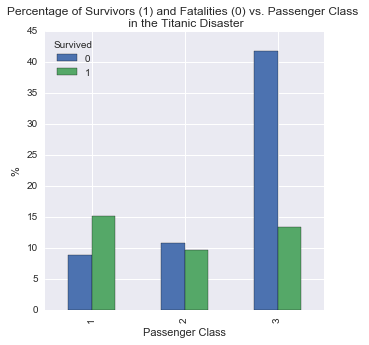

In [21]:
# Plot of the percetages:

pclasspercent.unstack("Survived").plot(kind="bar", figsize=(5,5))
plt.title("Percentage of Survivors (1) and Fatalities (0) vs. Passenger Class \n in the Titanic Disaster", fontsize=12)
plt.xlabel("Passenger Class")
plt.ylabel("%")

First class passengers have the highest number of survivors while third class passengers have the highest fatality.

In [22]:
# To see which class has the highest rate of survival, we calculate the fraction of survived within class. 

# Pivoting the table using .unstack makes the calculation easier:

survivetab = pclass_survival_grp.unstack("Survived")
survivetab

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [23]:
# The following calculates the percent survival within class.

survivetab['%survivedperclass'] = 100 * survivetab[1] / (survivetab[0] + survivetab[1])
survivetab

Survived,0,1,%survivedperclass
Pclass,,,
1,80,136,62.962963
2,97,87,47.282609
3,372,119,24.236253


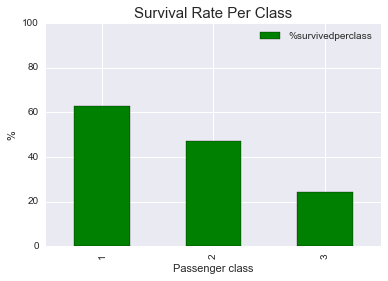

In [24]:
# Plot of the percetages:

survivetab.plot(kind='bar', y='%survivedperclass', ylim=[0,100], color='green')
plt.title("Survival Rate Per Class", fontsize=15)
plt.xlabel("Passenger class")
plt.ylabel("%")

This means that if the passenger is in first class, he/she had a 63% chance of survival, 47% if second class, and 24% if in third class for this sample of the Titanic passengers.

### Age

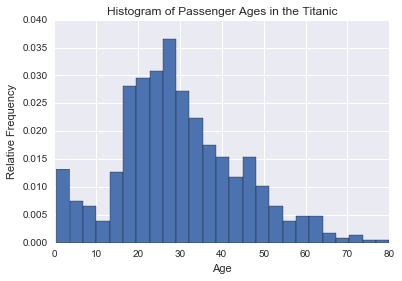

In [25]:
# Distribution of ages

data.Age.hist(bins=25, normed=1)
plt.ylabel("Relative Frequency")
plt.xlabel("Age")
plt.title("Histogram of Passenger Ages in the Titanic")

The distribution is positively skewed (also probably bi-modal).

In [26]:
# As shown in data.describe(), the mean age is 29.70. Maximum age is 80. Minimum age is half a year old. 
# The most frequent age is 24.0:

data.Age.mode()

0    24.0
dtype: float64

In [27]:
# Median age:

data.Age.median()

28.0

#### Distribution of age ranges (0-10, 11-20, etc.)

In [28]:
# Since there are a lot of ages, it's better to group them into ranges. 
# The following code groups the ages into decades by "integer dividing" the age 
# by ten to get integers and then multiplying it back by ten to get back the age but in the decades form. 
# The number of people having the same decades are then counted using .value_counts() function.

agerangecounts = (data.Age // 10 * 10).value_counts().sort_index()
print agerangecounts
print agerangecounts.sum()

0.0      62
10.0    102
20.0    220
30.0    167
40.0     89
50.0     48
60.0     19
70.0      6
80.0      1
Name: Age, dtype: int64
714


In [29]:
# Looking for missing ages (making sure it's not in the 0.0 age range):

zeroage = data[data.Age // 10 * 10 == 0]
print list(zeroage.Age)

[2.0, 4.0, 2.0, 8.0, 3.0, 7.0, 5.0, 4.0, 0.82999999999999996, 2.0, 9.0, 1.0, 9.0, 4.0, 1.0, 9.0, 1.0, 4.0, 3.0, 2.0, 5.0, 8.0, 3.0, 7.0, 2.0, 0.92000000000000004, 2.0, 3.0, 3.0, 1.0, 1.0, 3.0, 4.0, 5.0, 0.75, 2.0, 9.0, 9.0, 2.0, 7.0, 9.0, 8.0, 4.0, 9.0, 2.0, 0.75, 4.0, 6.0, 4.0, 6.0, 0.67000000000000004, 5.0, 8.0, 1.0, 0.41999999999999998, 6.0, 2.0, 1.0, 0.82999999999999996, 4.0, 9.0, 4.0]


It looks like agerangecounts does not include data with missing age. Also, the sum of agerangecounts series is 714.

In [30]:
# DataFrame for data without age:

noagedata = data[data.Age.isnull()]
noagedata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [31]:
len(noagedata)

177

In [32]:
177 + 714

891

Going back to agerangecounts data, I'd like to see the distribution of this data.

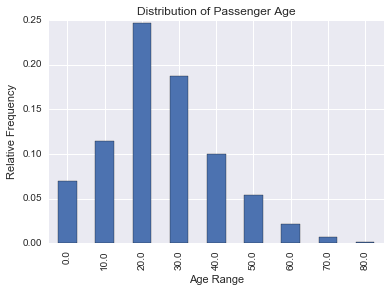

In [33]:
# Plotting this data in the normalized form:

(data.Age // 10 * 10).value_counts(normalize=True).sort_index().plot(kind='bar')
plt.ylabel('Relative Frequency')
plt.xlabel('Age Range')
plt.title('Distribution of Passenger Age')

# Not sure how to remove the .0s in the age ranges. I tried converting using int() but did not work.

#### Looking at survival and age group:

In [34]:
# Grouping by decades age and survival:

decadeagesurvived = data.groupby([(data.Age // 10 * 10), "Survived"]).size().unstack()
decadeagesurvived

Survived,0,1
Age,,
0.0,24.0,38.0
10.0,61.0,41.0
20.0,143.0,77.0
30.0,94.0,73.0
40.0,55.0,34.0
50.0,28.0,20.0
60.0,13.0,6.0
70.0,6.0,NaN
80.0,NaN,1.0


In [36]:
# It's appropriate to put 0 into NaNs in the table since they aren't missing, they are really non-existent.

decadeagesurvived = decadeagesurvived.fillna(0)
decadeagesurvived

Survived,0,1
Age,,
0.0,24.0,38.0
10.0,61.0,41.0
20.0,143.0,77.0
30.0,94.0,73.0
40.0,55.0,34.0
50.0,28.0,20.0
60.0,13.0,6.0
70.0,6.0,0.0
80.0,0.0,1.0


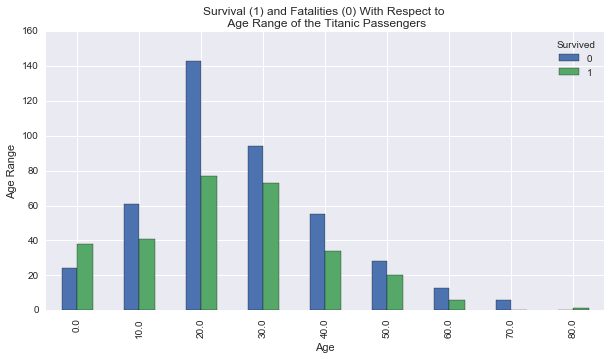

In [37]:
# Plot:

decadeagesurvived.plot(kind='bar', figsize=(10,5))
plt.ylabel('Number of Passengers')
plt.ylabel('Age Range')
plt.title('Survival (1) and Fatalities (0) With Respect to \n Age Range of the Titanic Passengers')

In [38]:
# Expressing this in terms of percetages per age range:

decadeagesurvived['percent'] = 100 * decadeagesurvived[1] / (decadeagesurvived[1] + decadeagesurvived[0])
decadeagesurvived

Survived,0,1,percent
Age,,,
0.0,24.0,38.0,61.290323
10.0,61.0,41.0,40.196078
20.0,143.0,77.0,35.000000
30.0,94.0,73.0,43.712575
40.0,55.0,34.0,38.202247
50.0,28.0,20.0,41.666667
60.0,13.0,6.0,31.578947
70.0,6.0,0.0,0.000000
80.0,0.0,1.0,100.000000


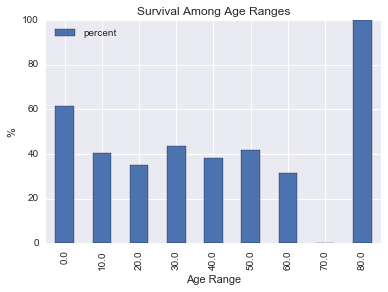

In [39]:
decadeagesurvived.plot(y='percent', kind='bar')
plt.title('Survival Among Age Ranges')
plt.ylabel('%')
plt.xlabel('Age Range')

There's a high chance of survival if you're old (though probably because that passenger is in first class). And also if you're less than ten years old. The lowest chance of survival is if you're in your twenties and sixties.

#### Age and passenger class

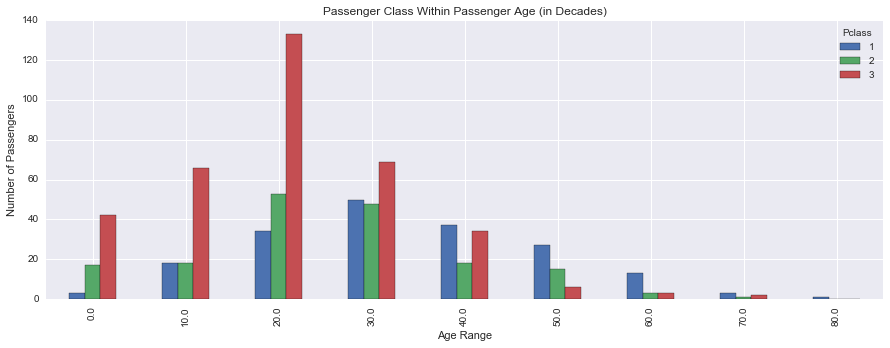

In [40]:
# A look at the distribution of passenger classes within passenger age (in decades)

data.groupby([(data.Age // 10 * 10), "Pclass"]).size().unstack().plot(kind='bar', figsize=(15,5))
plt.title('Passenger Class Within Passenger Age (in Decades)')
plt.ylabel('Number of Passengers')
plt.xlabel('Age Range')

### Passenger Class, Age, and Survival

In [41]:
# How does class and age affect survival? 
# The following code groups by age (in decades), class and survival. Survived column is unstacked. 

ageclassalive = data.groupby([(data.Age // 10 * 10), "Pclass", "Survived"]).size().unstack("Survived").fillna(0)
ageclassalive

Survived         0     1
Age  Pclass             
0.0  1         1.0   2.0
     2         0.0  17.0
     3        23.0  19.0
10.0 1         3.0  15.0
     2         9.0   9.0
     3        49.0  17.0
20.0 1        10.0  24.0
     2        31.0  22.0
     3       102.0  31.0
30.0 1        11.0  39.0
     2        29.0  19.0
     3        54.0  15.0
40.0 1        15.0  22.0
     2         8.0  10.0
     3        32.0   2.0
50.0 1        12.0  15.0
     2        10.0   5.0
     3         6.0   0.0
60.0 1         9.0   4.0
     2         2.0   1.0
     3         2.0   1.0
70.0 1         3.0   0.0
     2         1.0   0.0
     3         2.0   0.0
80.0 1         0.0   1.0

In [42]:
# Calculation of fraction survived within classes.

ageclassalive['FractionAlive'] = ageclassalive[1] / (ageclassalive[1] + ageclassalive[0])
ageclassalive

Survived         0     1  FractionAlive
Age  Pclass                            
0.0  1         1.0   2.0       0.666667
     2         0.0  17.0       1.000000
     3        23.0  19.0       0.452381
10.0 1         3.0  15.0       0.833333
     2         9.0   9.0       0.500000
     3        49.0  17.0       0.257576
20.0 1        10.0  24.0       0.705882
     2        31.0  22.0       0.415094
     3       102.0  31.0       0.233083
30.0 1        11.0  39.0       0.780000
     2        29.0  19.0       0.395833
     3        54.0  15.0       0.217391
40.0 1        15.0  22.0       0.594595
     2         8.0  10.0       0.555556
     3        32.0   2.0       0.058824
50.0 1        12.0  15.0       0.555556
     2        10.0   5.0       0.333333
     3         6.0   0.0       0.000000
60.0 1         9.0   4.0       0.307692
     2         2.0   1.0       0.333333
     3         2.0   1.0       0.333333
70.0 1         3.0   0.0       0.000000
     2         1.0   0.0       0.000000
     3         2.0   0.0       0.000000
80.0 1         0.0   1.0       1.000000

In [43]:
# A different dataframe is made with only this fraction. The class is then pivoted up.

ageclassalive2 = ageclassalive
ageclassalive2['FractionAlive'].unstack('Pclass').fillna(0)

Pclass,1,2,3
Age,,,
0.0,0.666667,1.000000,0.452381
10.0,0.833333,0.500000,0.257576
20.0,0.705882,0.415094,0.233083
30.0,0.780000,0.395833,0.217391
40.0,0.594595,0.555556,0.058824
50.0,0.555556,0.333333,0.000000
60.0,0.307692,0.333333,0.333333
70.0,0.000000,0.000000,0.000000
80.0,1.000000,0.000000,0.000000


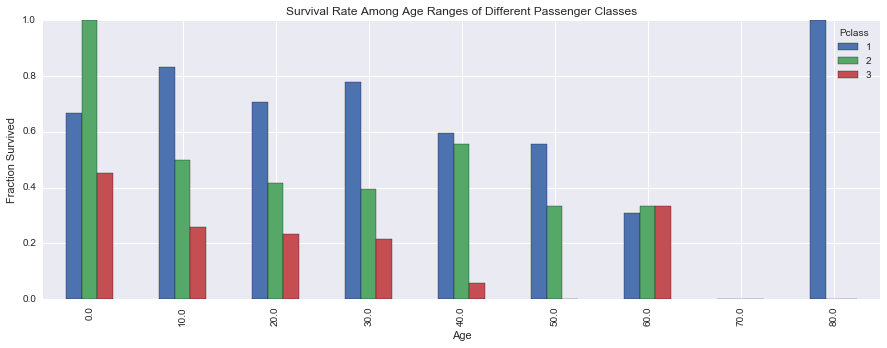

In [44]:
# Plot of the data from above.

ageclassalive2['FractionAlive'].unstack('Pclass').fillna(0).plot(kind='bar', figsize=(15,5))
plt.ylabel('Fraction Survived')
plt.xlabel('Age')
plt.title('Survival Rate Among Age Ranges of Different Passenger Classes')

#### Conclusion

Note that I didn't look at other fields/factor that might affect survival. I've only looked at how age, passenger class, and sex relate to survival in the Titanic sinking. However, this only looked at 891 passengers out of the over 2000 passengers. Looking at this sample of the Titanic passengers, it looks like the highest survival rates are seen among females, in children younger than 10 (and that for the 80 year olds), and if  the passenger class is 1. The lowest survival rates are seen among males, third class passengers, and passengers older than 60 years old, although the passenger class can up the survival rates at higher ages. But the highest fatality is seen in the twenty year olds, simply because they make up most of the passengers and are mostly third class passengers. 